In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

2025-04-23 03:53:12.063246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745380392.312225      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745380392.379335      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
datasetFolder = "/kaggle/input/the-rvlcdip-dataset-test/test"

In [3]:
train = pathlib.Path(os.path.join(datasetFolder))

In [4]:
def get_images_labels(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (120, 120))
    img1 = img[0:30, 0:120]/255
    img2 = img[30:90, 0:60]/255
    img3 = img[30:90, 60:120]/255
    img4 = img[90:120, 0:120]/255
    img = np.asarray([cv2.resize(img1, (48, 48)),
                      cv2.resize(img2, (48, 48)),
                      cv2.resize(img3, (48, 48)),
                      cv2.resize(img4, (48, 48))])
    img_mean = np.mean(img)
    img = img - img_mean
    img = img / np.std(img)
    arr.append(img)
    labels.append(label)
  return [arr, labels]

In [5]:
[advertisement, Y_advertisement] = get_images_labels(list(train.glob("advertisement/*.*")), 0)
[budget, Y_budget] = get_images_labels(list(train.glob("budget/*.*")), 1)
[email, Y_email] = get_images_labels(list(train.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = get_images_labels(list(train.glob("file_folder/*.*")), 3)
[form, Y_form] = get_images_labels(list(train.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = get_images_labels(list(train.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = get_images_labels(list(train.glob("invoice/*.*")), 6)
[letter, Y_letter] = get_images_labels(list(train.glob("letter/*.*")), 7)
[memo, Y_memo] = get_images_labels(list(train.glob("memo/*.*")), 8)
[news_article, Y_news_article] = get_images_labels(list(train.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = get_images_labels(list(train.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = get_images_labels(list(train.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = get_images_labels(list(train.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = get_images_labels(list(train.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = get_images_labels(list(train.glob("specification/*.*")), 14)

In [6]:
advertisement[0]

array([[[ 0.32194233,  0.83581793,  0.83581793, ...,  1.24112827,
          1.24112827,  1.24112827],
        [ 0.45493478,  1.0131412 ,  1.0131412 , ...,  1.24112827,
          1.18729799,  1.24112827],
        [ 0.62592508,  1.24112827,  1.24112827, ...,  1.24112827,
          1.12577767,  1.24112827],
        ...,
        [ 0.62592508,  1.24112827,  1.24112827, ...,  1.08732747,
          0.01901507,  1.24112827],
        [ 0.62592508,  1.24112827,  1.24112827, ...,  1.24112827,
          0.51962159,  1.24112827],
        [ 0.62592508,  1.24112827,  1.24112827, ...,  1.24112827,
          0.96609625,  1.24112827]],

       [[-0.91208289,  1.24112827,  1.24112827, ..., -1.21787507,
         -1.21787507, -0.63599538],
        [-0.91208289,  1.24112827,  1.24112827, ..., -1.18575784,
         -0.9980304 , -0.51808144],
        [-0.91208289,  1.24112827,  1.24112827, ..., -0.56527717,
         -0.61503626, -0.04310839],
        ...,
        [-0.91781273,  1.2124791 ,  1.24112827, ..., -

In [7]:
images = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

In [8]:
images = np.asarray(images)
labels = np.asarray(labels)

In [9]:
images.shape

(37427, 4, 48, 48)

In [10]:
labels.shape

(37427,)

In [12]:
labels[0]

0

In [13]:
labels = to_categorical(labels)

In [14]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
images.shape

(37427, 4, 48, 48)

In [16]:
m = tf.keras.models.Sequential()
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(512, 3, activation = "relu" ), input_shape=(4, 48, 48, 1)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, activation = "relu")))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
m.add(tf.keras.layers.GlobalAveragePooling1D())
m.add(tf.keras.layers.Dense(1024, activation = "sigmoid"))
m.add(tf.keras.layers.Dropout(0.2))
m.add(tf.keras.layers.Dense(15, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1745380927.797646      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745380927.798351      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [17]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 4, 46, 46, 512)      │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 4, 23, 23, 512)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 4, 23, 23, 512)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 4, 21, 21, 256)      │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 4, 10, 10, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 4, 10, 10, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 4, 25600)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 25600)               │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      26,215,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          15,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,415,823 (104.58 MB)

 Trainable params: 27,415,823 (104.58 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
m.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ TruePositives(name='tp'), 
                         FalsePositives(name='fp'), 
                         TrueNegatives(name='tn'), 
                         FalseNegatives(name='fn'), 
                         "accuracy", 
                         Precision(name='precision'), 
                         Recall(name='recall'), 
                         AUC(name='auc')])

In [19]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 5, mode = 'min', restore_best_weights = True)

In [20]:
history = m.fit(images, labels, epochs=40, batch_size= 16, 
                callbacks =[earlyStopping])

Epoch 1/40


I0000 00:00:1745380939.248844      99 service.cc:148] XLA service 0x7d32c000dc10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745380939.249780      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745380939.249800      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745380939.875975      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/2340 ━━━━━━━━━━━━━━━━━━━━ 3:49 98ms/step - accuracy: 0.0312 - auc: 0.4739 - fn: 24.0000 - fp: 0.0000e+00 - loss: 3.3049 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 336.0000 - tp: 0.0000e+00      

I0000 00:00:1745380948.536727      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2340/2340 ━━━━━━━━━━━━━━━━━━━━ 181s 71ms/step - accuracy: 0.2803 - auc: 0.7573 - fn: 16494.1133 - fp: 899.6967 - loss: 2.2585 - precision: 0.6964 - recall: 0.0977 - tn: 261404.0469 - tp: 2241.8696
Epoch 2/40
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 164s 70ms/step - accuracy: 0.4466 - auc: 0.8761 - fn: 14289.5283 - fp: 1518.1431 - loss: 1.7338 - precision: 0.7464 - recall: 0.2319 - tn: 260785.6094 - tp: 4446.4541
Epoch 3/40
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 163s 70ms/step - accuracy: 0.5026 - auc: 0.8993 - fn: 13183.9453 - fp: 1743.7911 - loss: 1.5741 - precision: 0.7642 - recall: 0.2952 - tn: 260559.9531 - tp: 5552.0371
Epoch 4/40
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 163s 70ms/step - accuracy: 0.5358 - auc: 0.9127 - fn: 12356.9033 - fp: 1916.6143 - loss: 1.4711 - precision: 0.7715 - recall: 0.3395 - tn: 260387.1406 - tp: 6379.0786
Epoch 5/40
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 163s 70ms/step - accuracy: 0.5591 - auc: 0.9234 - fn: 11668.7783 - fp: 1979.6108 - loss: 1.3846 - precision: 0.7853 - recall: 0.3774 -

In [21]:
m.save('/kaggle/working/m.h5')

In [23]:
m.evaluate(images, labels, batch_size=16)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 66s 27ms/step - accuracy: 0.9875 - auc: 0.9997 - fn: 435.4336 - fp: 147.3413 - loss: 0.0742 - precision: 0.9923 - recall: 0.9784 - tn: 262156.4062 - tp: 18300.5488


[0.08616772294044495,
 36464.0,
 317.0,
 523661.0,
 963.0,
 0.985090970993042,
 0.9913814067840576,
 0.9742699265480042,
 0.9996698498725891]

In [24]:
y_pred = m.predict(images, batch_size=16, verbose= 1)
y_pred = np.argmax(y_pred, axis = 1)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step


In [25]:
y_test = np.argmax(labels, axis = 1)
y_test

array([ 0,  0,  0, ..., 14, 14, 14])

In [26]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.985090977102092

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2515
           1       0.98      0.98      0.98      2505
           2       1.00      1.00      1.00      2516
           3       0.97      0.98      0.98      2527
           4       0.96      0.99      0.97      2506
           5       0.99      0.99      0.99      2532
           6       0.98      0.98      0.98      2477
           7       0.99      0.98      0.99      2464
           8       0.99      0.99      0.99      2492
           9       1.00      0.99      0.99      2463
          10       0.99      0.97      0.98      2489
          11       0.98      0.98      0.98      2435
          12       1.00      0.99      0.99      2536
          13       0.99      0.97      0.98      2498
          14       0.99      0.99      0.99      2472

    accuracy                           0.99     37427
   macro avg       0.99      0.99      0.99     37427
weighted avg       0.99   

In [28]:
classes = list(range(15))
res = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2495,1,0,23,4,3,0,6,0,7,8,6,1,4,0
1,5,2464,2,3,6,4,10,0,2,3,9,2,2,4,5
2,0,0,2508,0,0,0,0,1,0,0,0,0,0,0,0
3,6,7,0,2483,1,1,4,4,2,3,24,4,0,11,0
4,3,14,0,3,2477,4,26,6,5,4,6,11,5,17,6
5,2,1,0,0,2,2505,0,2,1,0,0,8,1,4,2
6,0,4,0,2,3,1,2431,1,4,2,9,5,1,6,3
7,1,0,0,1,1,4,3,2424,5,0,3,1,0,2,1
8,1,0,1,1,1,0,1,5,2458,1,5,1,2,2,1
9,0,0,0,0,1,1,0,1,1,2433,1,1,0,1,0


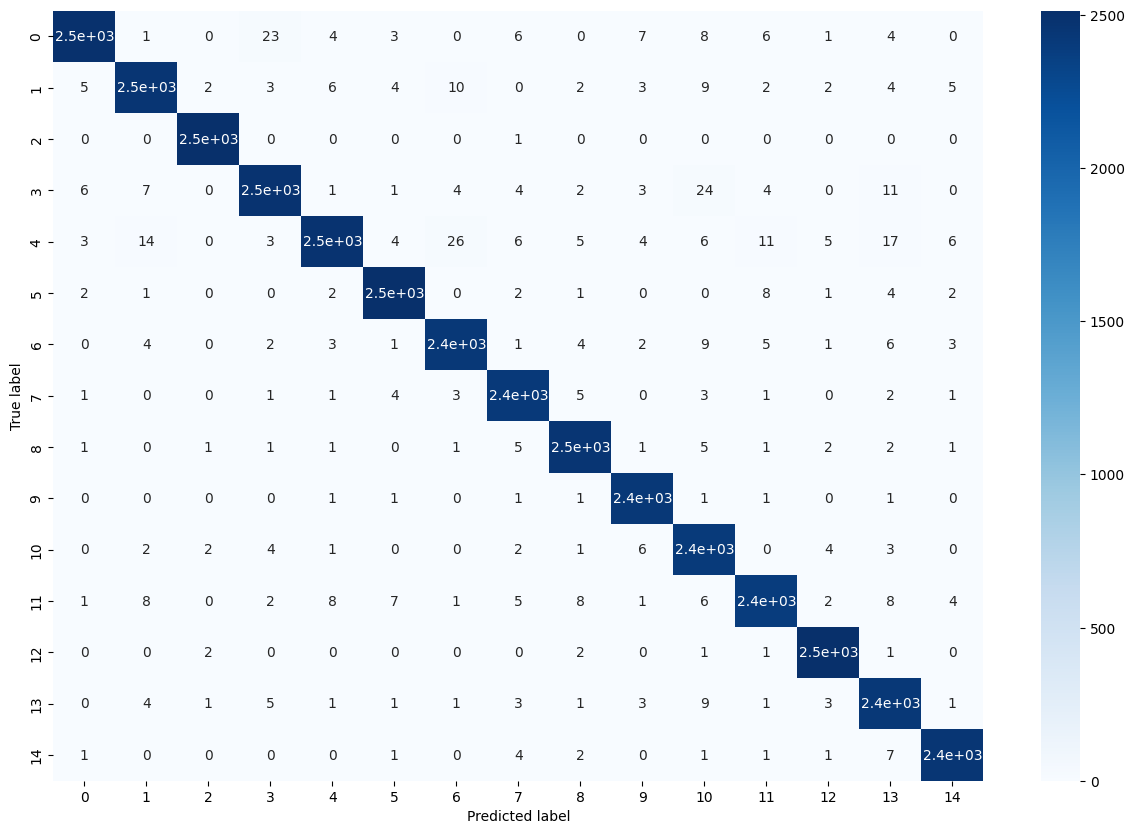

In [29]:
import seaborn as sns
figure = plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()